In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

make a scatterplot showing average income in a state vs proportion of women in that state

In [2]:
df_raw = pd.read_csv("states_dat.csv")
df_raw.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0.0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1.0,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2.0,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3.0,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4.0,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     float64
 1   State       69 non-null     object 
 2   TotalPop    69 non-null     object 
 3   Hispanic    69 non-null     object 
 4   White       69 non-null     object 
 5   Black       69 non-null     object 
 6   Native      69 non-null     object 
 7   Asian       69 non-null     object 
 8   Pacific     64 non-null     object 
 9   Income      69 non-null     object 
 10  GenderPop   69 non-null     object 
dtypes: float64(1), object(10)
memory usage: 6.1+ KB


In [4]:
drop = df_raw.columns[0]
df_raw = df_raw.drop(columns = drop)
df_raw.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [5]:
to_num = df_raw.columns[1:8]
df_raw[to_num] = df_raw[to_num].replace("(%$)","", regex=True)
df_raw

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,$67264.78230266465,19087135M_19334329F
...,...,...,...,...,...,...,...,...,...,...
64,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,$55602.96721311475,308573M_318031F
65,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,$72866.01341201717,4060948M_4195682F
66,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,$64493.76768377254,3487725M_3497739F
67,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,$41437.11157024794,913631M_937789F


In [6]:
df_raw["Income"] = df_raw["Income"].replace("^\$","",regex=True)
df_raw

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135M_19334329F
...,...,...,...,...,...,...,...,...,...,...
64,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573M_318031F
65,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948M_4195682F
66,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725M_3497739F
67,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631M_937789F


In [7]:
splitt= df_raw.GenderPop.str.split("_", expand=True)
df_raw["MalePop"] = splitt.get(0)
df_raw["FemPop"] = splitt.get(1)
df_edt = df_raw.drop(columns="GenderPop")
df_edt

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093M,2489527F
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160M,349215F
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913M,1506295F
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135M,19334329F
...,...,...,...,...,...,...,...,...,...,...,...
64,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573M,318031F
65,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948M,4195682F
66,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725M,3497739F
67,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631M,937789F


In [8]:
string = "qwertyuiop"
string[-2:]

'op'

In [9]:
dmf = df_edt.columns[-2:]
df_edt[dmf] = df_edt[dmf].replace("(M|F)$","",regex=True)
df_edt

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135,19334329
...,...,...,...,...,...,...,...,...,...,...,...
64,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573,318031
65,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948,4195682
66,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725,3497739
67,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631,937789


In [10]:
to_num = df_edt.columns[1:]
df_edt[to_num] = df_edt[to_num].apply(pd.to_numeric, errors="coerce")
df_num = df_edt
df_num

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop
0,Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0
1,Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0
2,Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0
3,Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0
4,California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0
...,...,...,...,...,...,...,...,...,...,...,...
64,Vermont,626604.0,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601,55602.967213,308573.0,318031.0
65,Virginia,8256630.0,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715,72866.013412,4060948.0,4195682.0
66,Washington,6985464.0,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896,64493.767684,3487725.0,3497739.0
67,West Virginia,1851420.0,1.290909,92.176240,3.662810,0.152686,0.682438,0.026446,41437.111570,913631.0,937789.0


In [11]:
df_num = df_num.dropna()
df_num = df_num.drop_duplicates()
df_num

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop
0,Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0
1,Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0
2,Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0
3,Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0
4,California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0
8,Connecticut,3593222.0,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607.0,1841615.0
10,District of Columbia,647484.0,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674.0,340810.0
11,Florida,19645772.0,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009.0,10045763.0
12,Georgia,10006693.0,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331.0,5123362.0
15,Hawaii,1406299.0,9.186709,25.032278,2.052848,0.144937,36.592089,8.758861,73264.426282,709871.0,696428.0


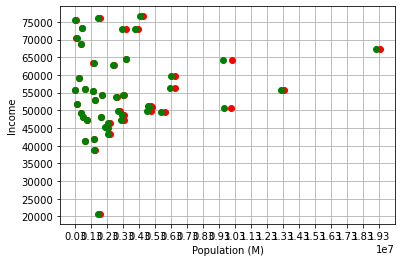

In [12]:
from matplotlib.pyplot import figure

ax = plt.gca()
ax.scatter(df_num.FemPop, df_num.Income, color="r")
ax.scatter(df_num.MalePop, df_num.Income, color="g")
plt.xlabel("Population (M)")
plt.ylabel("Income")

plt.style.use(["dark_background"])
plt.rcParams['figure.figsize'] = [18, 9]

plt.grid()
plt.xticks(np.arange(300000, max(df_num.FemPop), 1000000.0))
plt.yticks(np.arange(20000, max(df_num.Income), 5000.0))
plt.style.use(["dark_background"])
ax.set_axisbelow(True)
plt.show()

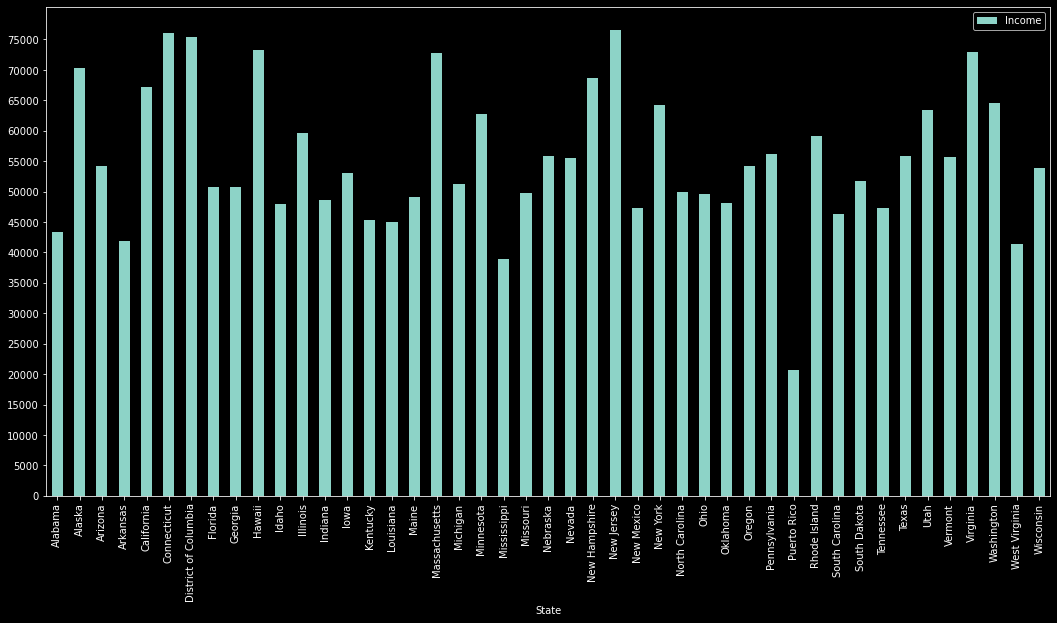

In [13]:
df_num.plot("State", "Income", kind="bar")
plt.yticks(np.arange(0, df_num.Income.max(), 5000))

plt.style.use(["dark_background"])
plt.show()

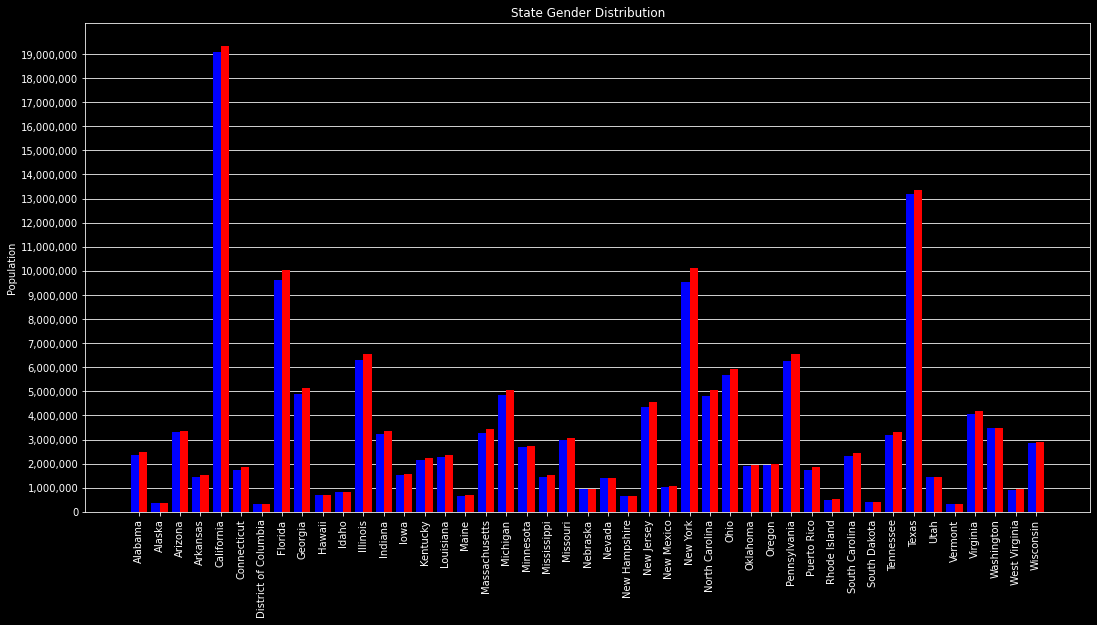

In [14]:
x = np.arange(len(df_num.State))
width = 0.4

fig, ax = plt.subplots()
ax.bar(x - width/2, df_num.MalePop, width, label='Male', color="b")
ax.bar(x + width/2, df_num.FemPop, width, label='Female', color="r")

plt.yticks(np.arange(0, df_num.FemPop.max(), 1000000))

ax.set_ylabel('Population')
ax.set_title('State Gender Distribution')
ax.set_xticks(x, df_num.State)
plt.xticks(rotation=90)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.style.use(["dark_background"])
plt.grid(axis="y")
ax.set_axisbelow(True)
plt.show()

In [15]:
df_num.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop
0,Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0
1,Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0
2,Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0
3,Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0
4,California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0


In [16]:
df_num["FemProp"] = round(((df_num["FemPop"] / df_num["TotalPop"])*100),2)
df_num["MaleProp"] = round(((df_num["MalePop"] / df_num["TotalPop"])*100),2)
df_num.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop,FemProp,MaleProp
0,Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0,51.54,48.46
1,Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0,47.62,52.38
2,Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0,50.33,49.67
3,Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0,50.92,49.08
4,California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0,50.32,49.68


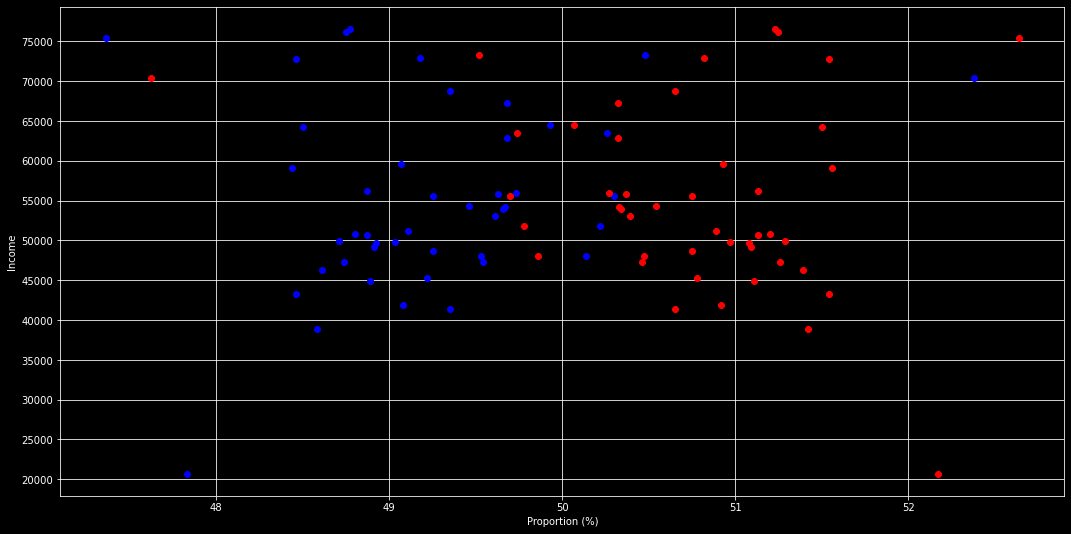

In [17]:
ax = plt.gca()
ax.scatter(df_num.MaleProp, df_num.Income, color="b")
ax.scatter(df_num.FemProp, df_num.Income, color="r")
plt.xlabel("Proportion (%)")
plt.ylabel("Income")

plt.style.use(["dark_background"])
plt.rcParams['figure.figsize'] = [18, 9]

plt.grid()
plt.yticks(np.arange(20000, max(df_num.Income), 5000.0))
plt.style.use(["dark_background"])
ax.set_axisbelow(True)
plt.show()

In [39]:
most = df_num.head(10)
most = most.sort_values("TotalPop", ascending=False)
most

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemPop,FemProp,MaleProp
4,California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0,50.32,49.68
11,Florida,19645772.0,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009.0,10045763.0,51.13,48.87
12,Georgia,10006693.0,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331.0,5123362.0,51.20,48.80
2,Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0,50.33,49.67
0,Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0,51.54,48.46
8,Connecticut,3593222.0,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607.0,1841615.0,51.25,48.75
3,Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0,50.92,49.08
15,Hawaii,1406299.0,9.186709,25.032278,2.052848,0.144937,36.592089,8.758861,73264.426282,709871.0,696428.0,49.52,50.48
1,Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0,47.62,52.38
10,District of Columbia,647484.0,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674.0,340810.0,52.64,47.36


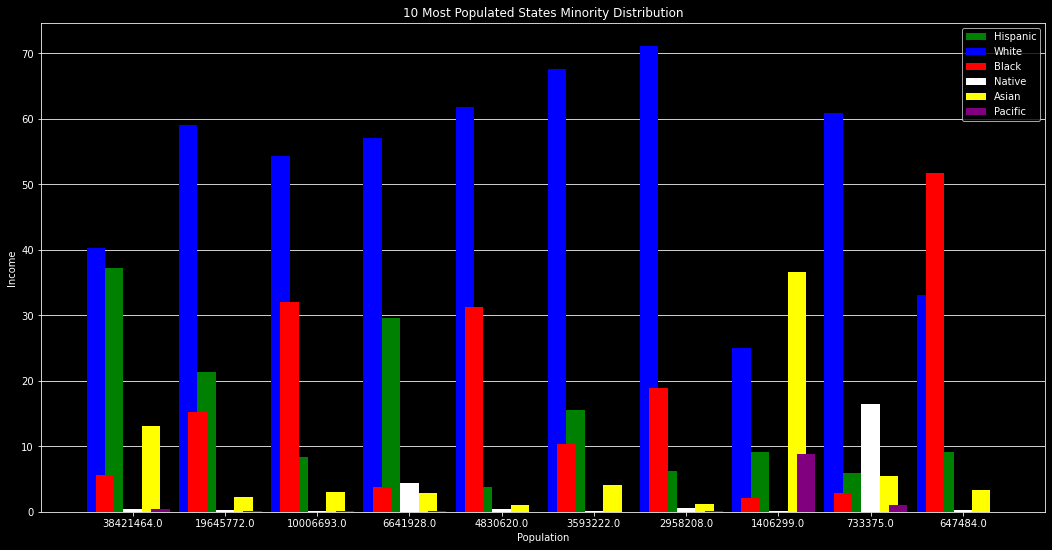

In [67]:
import matplotlib as mpl
x = np.arange(len(most))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - 0.2, most.Hispanic, width, label='Hispanic', color="green")
ax.bar(x - 0.4, most.White, width, label='White', color="blue")
ax.bar(x - 0.3, most.Black, width, label='Black', color="red")
ax.bar(x + 0, most.Native, width, label='Native', color="w")
ax.bar(x + 0.2, most.Asian, width, label='Asian', color="yellow")
ax.bar(x + 0.3, most.Pacific, width, label='Pacific', color="purple")

ax.set_ylabel('Income')
ax.set_xlabel("Population")
ax.set_title('10 Most Populated States Minority Distribution')
ax.set_xticks(x, most.TotalPop)

plt.style.use(["dark_background"])
plt.grid(axis="y")
ax.set_axisbelow(True)
plt.legend()
plt.show()